In [2]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [13]:
#randomly split the X and y arrays into 30% test data and 70% training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
#standardize features
sc = StandardScaler()
#estimate sample mean and standard deviation
sc.fit(X_train)
#standardize each feature dimension of training data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [16]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter = 40, eta0 = 0.1, random_state = 0)
#fit with training data
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [18]:
#predict with test data
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' %(y_test != y_pred).sum())

Misclassified samples: 4


In [19]:
#accuracy(%)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [38]:
#plot decision regions of model and visualize separation
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    # set up marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx2.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = cmap(idx), marker = markers[idx], label= cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c = '', alpha = 1.0, linewidth = 1, marker = 'o', s = 55, label = 'Test Set')

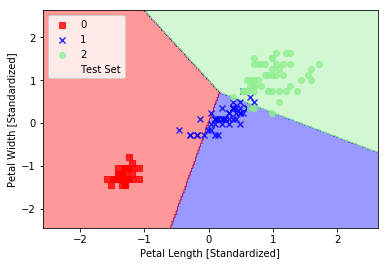

In [41]:
# specify the indices of the samples to mark on the plots
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = ppn, test_idx = range(105, 150))
plt.xlabel('Petal Length [Standardized]')
plt.ylabel('Petal Width [Standardized]')
plt.legend(loc = 'upper left')
plt.show()

The perceptron algorithm never converges on datasets that aren't perfectly linearly separable, which is why the use of the perceptron algorithm is typically not recommended in practice.